In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [43]:
X=pd.read_csv("https://raw.githubusercontent.com/mabhay3420/Deep-Into-CNN/master/Datasets/diabetes2.csv",sep=',')
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


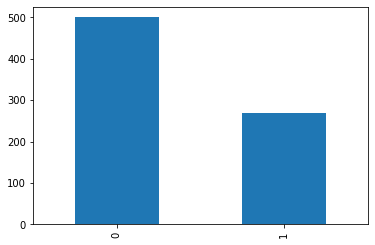

In [44]:
X['Outcome'].value_counts().plot(kind='bar')

In [45]:
X.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
y=X["Outcome"]
X_train,X_test,y_train,y_test= train_test_split(X.iloc[:,:-1],y,test_size=0.2,random_state=12)

In [21]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
120,0,162,76,56,100,53.2,0.759,25
172,2,87,0,23,0,28.9,0.773,25
307,0,137,68,14,148,24.8,0.143,21
7,10,115,0,0,0,35.3,0.134,29
448,0,104,64,37,64,33.6,0.510,22


In [47]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit(X_train.values)
X_train=scale.transform(X_train.values)
X_test=scale.transform(X_test.values)

In [49]:
X_train=pd.DataFrame(X_train,columns=X.iloc[:,:-1].columns)
X_test=pd.DataFrame(X_test,columns=X.iloc[:,:-1].columns)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.123751,1.281902,-0.992836,-1.304412,-0.697197,-1.235695,-0.656592,2.755306
1,-0.830016,-1.007253,-2.354840,-0.090333,-0.477340,-0.505362,0.256584,-1.044456
2,0.638658,1.313696,-0.364219,-1.304412,-0.697197,-0.938610,-0.884138,1.459932
3,-1.123751,1.854191,-0.992836,0.995949,0.701093,0.732490,-0.054794,-0.958098
4,-0.830016,0.232706,0.997785,1.187646,0.270173,0.571569,1.747605,0.337275


In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=12,)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_predict_test=lr.predict(X_test)
y_predict_train=lr.predict(X_train)


In [59]:
from sklearn.metrics import accuracy_score
print("train:Score",accuracy_score(y_train,y_predict_train))
print("test:Score",accuracy_score(y_test,y_predict_test))


train:Score 0.7687296416938111
test:Score 0.8116883116883117


In [60]:
print((y_predict_test==y_test).sum(),"/",y_test.count())

125 / 154
